### Assignment 1: Supply Chain Analtyics 

# Assignment 1: Supply Chain Analytics 

Nov 4, 2024

| Nr |**Name**|**Student ID**|**Email**|
|----|--------|--------------|---------|
| 1. |  Katja Tophoff      |     13378678         |     katja.tophoff@gmail.com   |
| 2. |  Nicky Trijbits      |     12857815         |     nicky.trijbits@student.vu.nl    |
| 3. |       |             |        |
| 4. |       |              |        |

In [135]:
# uploading needed packages 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
sns.set_theme()

In [108]:
# needed to download .ods file  
!pip install odfpy

In [137]:
# importing data --> using ods file because dates are in a better format 
data = pd.read_excel('/Users/gijs/Downloads/Homework1_TSA130.ods')

data.head()

,Number of Passengers (x1000),Date
0,113,2014-01-01
1,119,2014-02-01
2,139,2014-03-01
3,129,2014-04-01
4,124,2014-05-01


### I. Visualize the data, check for strange values, and identify trends or seasonality visually.

In [138]:
print(data.describe())

       Number of Passengers (x1000)                           Date
count                    130.000000                            130
mean                     265.207692  2019-05-17 08:51:41.538461440
min                      107.000000            2014-01-01 00:00:00
25%                      180.250000            2016-09-08 12:00:00
50%                      245.000000            2019-05-16 12:00:00
75%                      343.500000            2022-01-24 06:00:00
max                      569.000000            2024-10-01 00:00:00
std                      106.316603                            NaN


In [139]:
# missing values and duplicates 
missing_values = data.isnull().sum().sum()
duplicates = data.duplicated().sum()

if missing_values == 0:
    print("Missing values: None")
else:
    print(f"Missing values:\n{data.isnull().sum()}")

if duplicates == 0:
    print("Duplicates: None")
else:
    print(f"Duplicates: {duplicates}")

Missing values: None
Duplicates: None


In [140]:
# strange values --> looking for either negative values or extremely large values 
strange_values = data[(data.iloc[:, 0] < 0) | (data.iloc[:, 0] > 1e7)]
if not strange_values.empty:
    print("Strange values:\n", strange_values)
else:
    print("Strange Values: None\n")

Strange Values: None



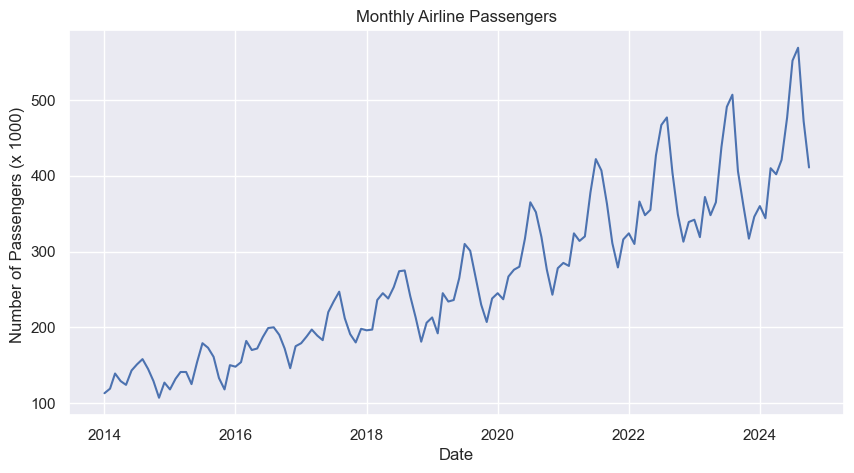

In [141]:
# identify trends and seasonality
plt.figure(figsize=(10, 5))
plt.plot(data.iloc[:, 1], data.iloc[:, 0], label='Passengers')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers (x 1000) ')
plt.show()


In [142]:
# using statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose

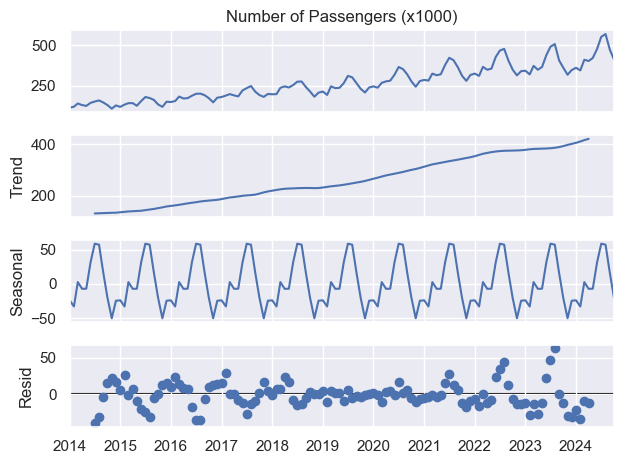

In [143]:
# identify trends and seasonality
data.set_index(data.columns[1], inplace=True)  
decomposition = seasonal_decompose(data.iloc[:, 0], model='additive', period=12)
decomposition.plot()
plt.show()

In [150]:
#using .csv instead of .ods file 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set_theme()

# call df instead of data, such that we may use both 
df = pd.read_csv('/Users/gijs/Downloads/Homework1_TSA130.csv')
print(df.isna().sum())
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.head()
df_test = df.iloc[-12:]
df_train = df.iloc[:-12]

Number of Passengers (x1000)    14
Date                            14
dtype: int64


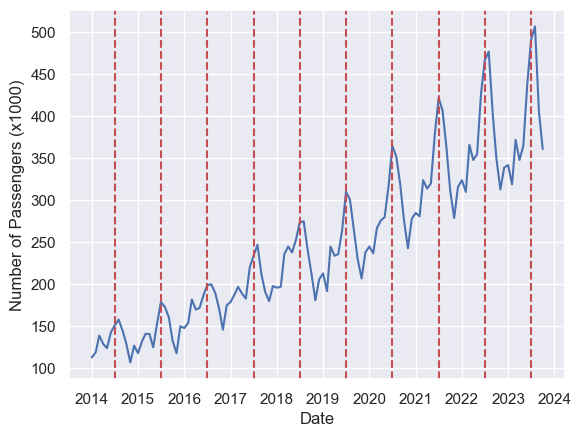

In [151]:
sns.lineplot(df_train, x='Date', y='Number of Passengers (x1000)')
for year in df_train['Date'].dt.year.unique():
    plt.axvline(pd.Timestamp(year, 7, 1), color='r', linestyle='--')

### II. Stationarity testing 

In [130]:
# importing needed packages 
!pip install statsmodels arch
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import PhillipsPerron
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [132]:
passenger_count = data.iloc[:, 0]

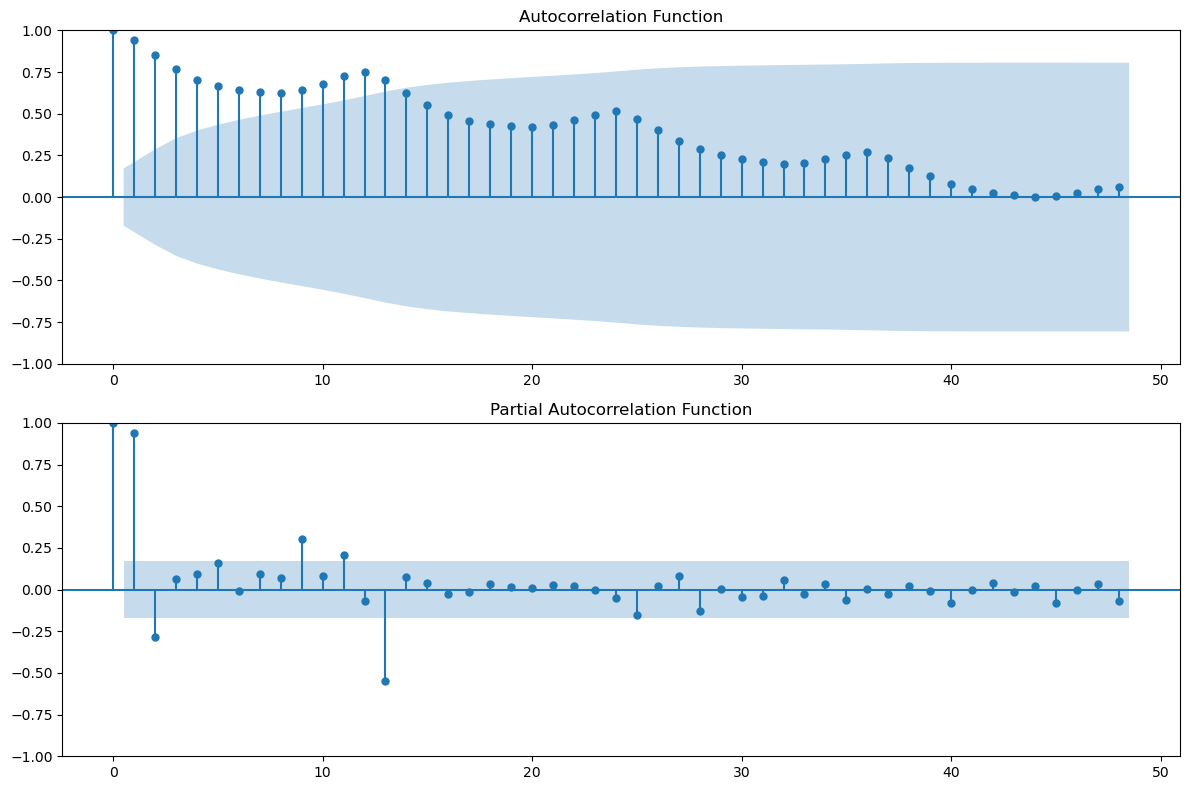

In [134]:
plt.figure(figsize=(12, 8))

# plot ACF --> to detect non-stationarity 
plt.subplot(2, 1, 1)
plot_acf(series, ax=plt.gca(), lags=48)  
plt.title('Autocorrelation Function')

# plot PACF
plt.subplot(2, 1, 2)
plot_pacf(series, ax=plt.gca(), lags=48, method='ywm')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [123]:
# ADF Test 
adf_result = adfuller(series)
print("ADF Test")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")
print("\n")


ADF Test
ADF Statistic: 0.7775109899033933
p-value: 0.9912643423700672
Critical Values:
   1%: -3.4880216384691867
   5%: -2.8867966864160075
   10%: -2.5802408234244947




In [125]:
# KPSS Test 
kpss_result = kpss(series, regression='c')
print("KPSS Test")
print(f"KPSS Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
print("Critical Values:")
for key, value in kpss_result[3].items():
    print(f"   {key}: {value}")
print("\n")

KPSS Test
KPSS Statistic: 1.8789948927133107
p-value: 0.01
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739




/var/folders/8l/pdzk0xqj31sfmx_07c_n7btc0000gn/T/ipykernel_98107/2522532128.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c')


In [126]:
# Phillips-Perron Test 
pp_result = PhillipsPerron(series)
print("Phillips-Perron Test:")
print(f"PP Statistic: {pp_result.stat}")
print(f"p-value: {pp_result.pvalue}")
print("Critical Values:")
for key, value in pp_result.critical_values.items():
    print(f"   {key}: {value}")
print("\n")

Phillips-Perron Test:
PP Statistic: -1.2582439475545473
p-value: 0.6480528146419637
Critical Values:
   1%: -3.482087964046026
   5%: -2.8842185101614626
   10%: -2.578864381347275




### III. Time Series Modeling: Exponential Smoothing Model

                           ExponentialSmoothing Model Results                           
Dep. Variable:     Number of Passengers (x1000)   No. Observations:                  118
Model:                     ExponentialSmoothing   SSE                          13464.021
Optimized:                                 True   AIC                            590.977
Trend:                                 Additive   BIC                            635.308
Seasonal:                        Multiplicative   AICC                           597.886
Seasonal Periods:                            12   Date:                 Mon, 04 Nov 2024
Box-Cox:                                  False   Time:                         16:20:03
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.285

<Axes: xlabel='Date', ylabel='Number of Passengers (x1000)'>

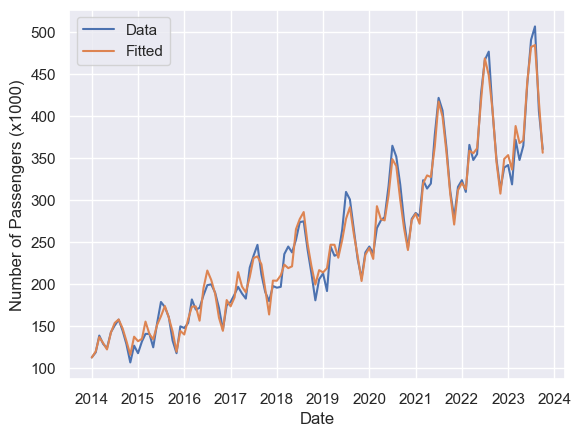

In [152]:
# We use exponential smoothing to fit the data, and the paramaters are optimized automatically by maximizing the log-likelihood --> optimization to select the right (hyper)parameters 
model = sm.tsa.ExponentialSmoothing(df_train['Number of Passengers (x1000)'], trend='add', seasonal='mul',seasonal_periods=12).fit(optimized=True)
print(model.summary())
model.fittedvalues

# Plot the training data and the fitted values
ax = sns.lineplot(df_train, x='Date', y='Number of Passengers (x1000)', label='Data')
sns.lineplot(x=df_train['Date'], y=model.fittedvalues, label='Fitted', ax=ax)


<Axes: xlabel='Date', ylabel='Number of Passengers (x1000)'>

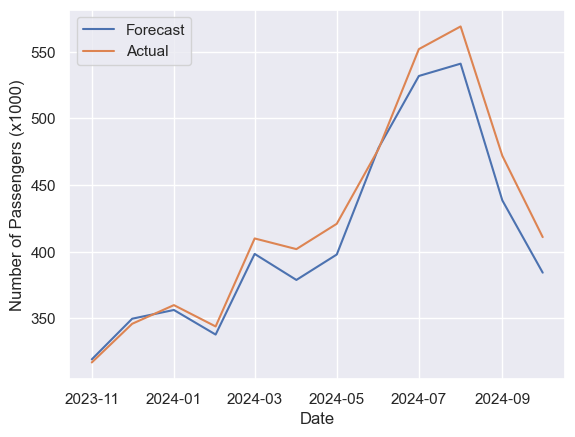

In [153]:
# Forecast the next 12 months
forecast = model.forecast(12)

# Plot the forecast
sns.lineplot(x=df_test['Date'], y=forecast, label='Forecast')
sns.lineplot(x=df_test['Date'], y=df_test['Number of Passengers (x1000)'], label='Actual')

In [154]:
exp_smoothing = model

### III. Time Series Modeling: SARIMA

/var/folders/8l/pdzk0xqj31sfmx_07c_n7btc0000gn/T/ipykernel_98107/1200672082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['differenced'] = df_train['Number of Passengers (x1000)'].diff()


Ellipsis

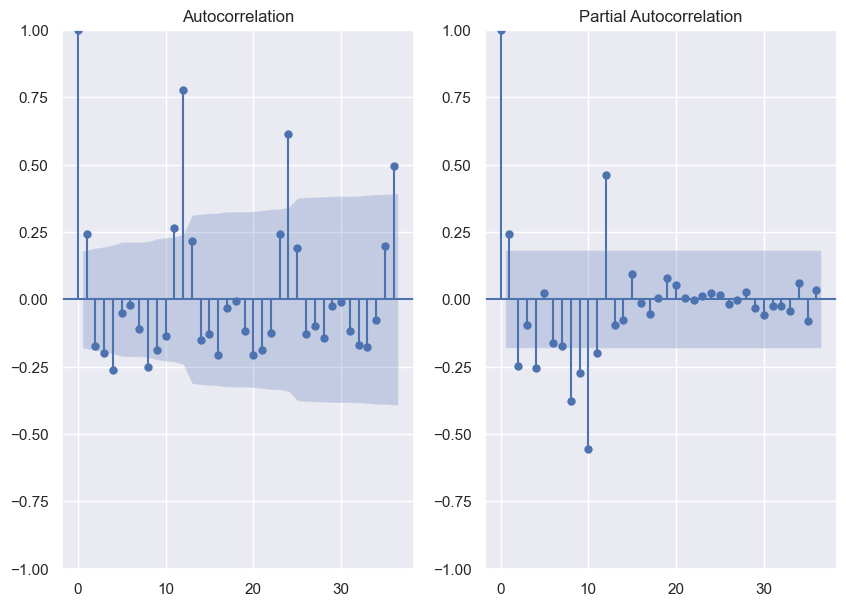

In [156]:
# Check the ACF and PACF
df_train['differenced'] = df_train['Number of Passengers (x1000)'].diff()
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sm.graphics.tsa.plot_acf(df_train['differenced'], lags=36, ax=ax[0], missing='drop')
sm.graphics.tsa.plot_pacf(df_train['differenced'].dropna(), lags=36, ax=ax[1])
...

In [157]:
sarima = sm.tsa.arima.ARIMA(df_train['Number of Passengers (x1000)'], order=(3, 0, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:     Number of Passengers (x1000)   No. Observations:                  118
Model:             ARIMA(3, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -409.156
Date:                          Mon, 04 Nov 2024   AIC                            832.311
Time:                                  16:21:43   BIC                            850.956
Sample:                                       0   HQIC                           839.868
                                          - 118                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4406      0.248      5.812      0.000       0.955       1.926
ar.L2         -0.3094      0.188     -1.643      0.100      -0.678       0.060
ar.L3         -0.1402      0.158     -0.889      0.374      -0.449       0.169
ma.L1         -0.8369      0.247     -3.389      0.001      -1.321      -0.353
ar.S.L12       0.9981      0.857      1.164      0.244      -0.683       2.679
ma.S.L12      -0.9849      3.478     -0.283      0.777      -7.802       5.832
sigma2       125.1114    324.783      0.385      0.700    -511.451     761.673
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.99   Prob(JB):                         0.65
Heteroskedasticity (H):               0.93   Skew:                             0.15
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [158]:
# Use grid search to find the best SARIMA model
best_aic = float('inf')
best_order = None
best_model = None
for p in range(5):
    for d in range(2):
        for q in range(5):
            try:
                model = sm.tsa.arima.ARIMA(df_train['Number of Passengers (x1000)'], order=(p, d, q), seasonal_order=(1, 1, 1, 12)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p, d, q)
                    best_model = model
            except:
                continue

/Users/gijs/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gijs/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gijs/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gijs/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/gijs/anaconda3/lib/python3.11/site-packages/statsmodels/base/

In [159]:
print(f'Best ARIMA order: {best_order}')
print(best_model.summary())

Best ARIMA order: (0, 1, 3)
                                     SARIMAX Results                                      
Dep. Variable:       Number of Passengers (x1000)   No. Observations:                  118
Model:             ARIMA(0, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -402.187
Date:                            Mon, 04 Nov 2024   AIC                            816.374
Time:                                    16:22:35   BIC                            832.298
Sample:                                         0   HQIC                           822.827
                                            - 118                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3759      0.109     -3.433      0.001      -0.590      -0.161
ma.L2  

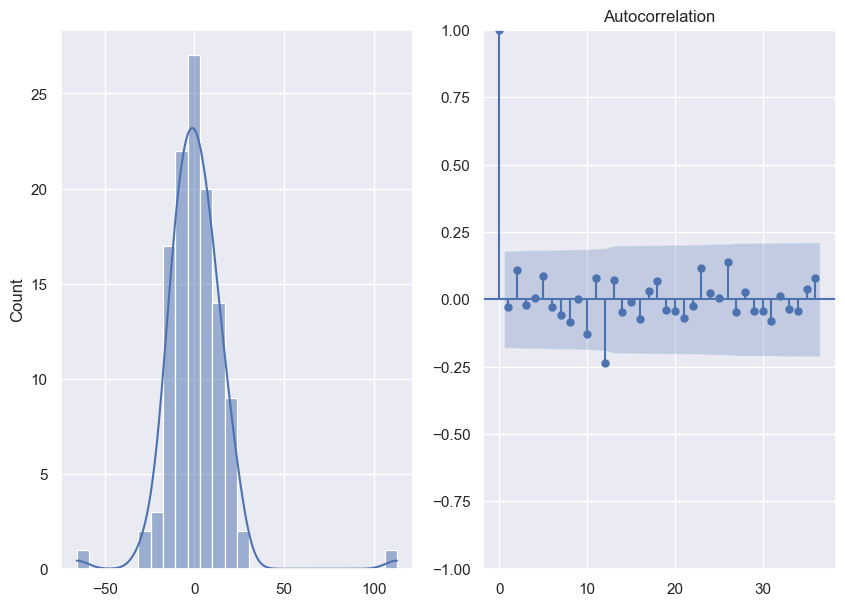

In [160]:
# Visualise the residuals, and check if there is any autocorrelation
residuals = best_model.resid
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
sns.histplot(residuals, kde=True, ax=ax[0])
sm.graphics.tsa.plot_acf(residuals, lags=36, ax=ax[1])
plt.show()

<Axes: xlabel='Date', ylabel='predicted_mean'>

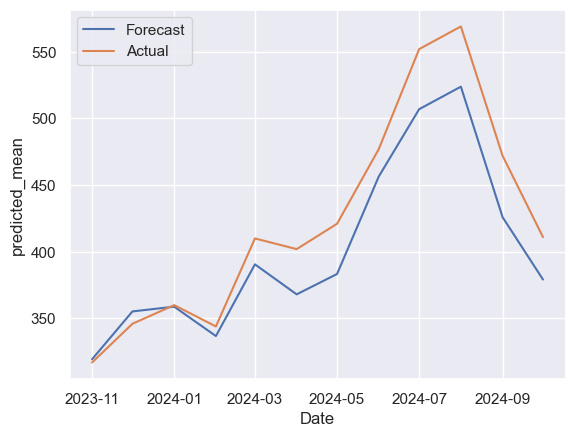

In [161]:
# Forecast the next 12 months
forecast = best_model.forecast(12)
# Plot the forecast
sns.lineplot(x=df_test['Date'], y=forecast, label='Forecast')
sns.lineplot(x=df_test['Date'], y=df_test['Number of Passengers (x1000)'], label='Actual')

In [162]:
sarima = best_model

### IV. Model evaluation

In [176]:
# RMSE at training data 
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

exp_smoothing_rmse = rmse(df_train['Number of Passengers (x1000)'], exp_smoothing.fittedvalues)

sarima_rmse = rmse(df_train['Number of Passengers (x1000)'], sarima.fittedvalues)

print(f'Exponential Smoothing - RMSE: {exp_smoothing_rmse}')
print(f'SARIMA - RMSE: {sarima_rmse}')

Exponential Smoothing - RMSE: 10.699782879477308
SARIMA - RMSE: 16.57056426552256


In [177]:
# MAPE at training data 
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

exp_smoothing_mape = mape(df_train['Number of Passengers (x1000)'], exp_smoothing.fittedvalues)

sarima_mape = mape(df_train['Number of Passengers (x1000)'], sarima.fittedvalues)

print(f'Exponential Smoothing - MAPE: {exp_smoothing_mape}')
print(f'SARIMA - MAPE: {sarima_mape}')


Exponential Smoothing - MAPE: 3.583287776479464
SARIMA - MAPE: 5.551513908046759


In [179]:
# Bias at training data
def bias(y_true, y_pred):
    return (y_pred - y_true).mean()


exp_smoothing_bias = bias(df_train['Number of Passengers (x1000)'], exp_smoothing.fittedvalues)
sarima_bias = bias(df_train['Number of Passengers (x1000)'], sarima.fittedvalues)

print(f'Exponential Smoothing - Bias: {exp_smoothing_bias}')
print(f'SARIMA - Bias: {sarima_bias}')

Exponential Smoothing - Bias: 0.643879161416696
SARIMA - Bias: -0.7334918258713586


In [181]:
# MAE at training data
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

exp_smoothing_mae = mae(df_train['Number of Passengers (x1000)'], exp_smoothing.fittedvalues)
sarima_mae = mae(df_train['Number of Passengers (x1000)'], sarima.fittedvalues)

print(f'Exponential Smoothing - MAE: {exp_smoothing_mae}')
print(f'SARIMA - MAE: {sarima_mae}')


Exponential Smoothing - MAE: 8.294691622132952
SARIMA - MAE: 10.73085717073704


### V. Forecasting

In [167]:
# Add test data to the models
exp_smoothing = sm.tsa.ExponentialSmoothing(df['Number of Passengers (x1000)'], trend='add', seasonal='mul',seasonal_periods=12).fit(optimized=True)
sarima.extend(df_test)

/Users/gijs/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gijs/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gijs/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


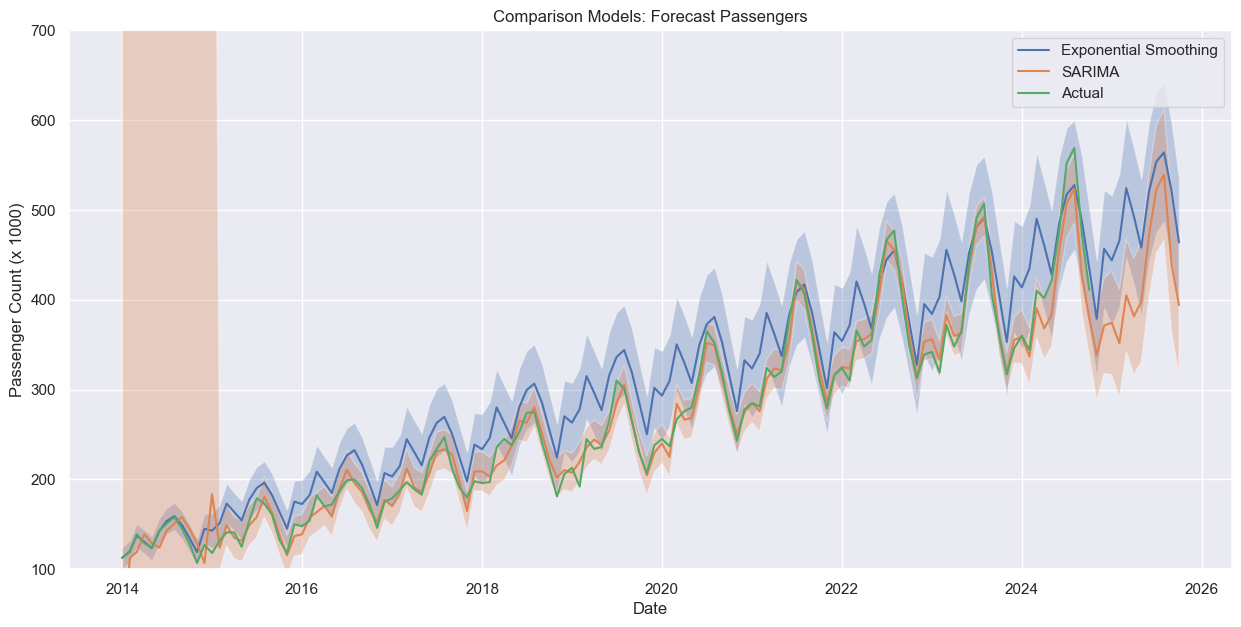

In [185]:
fig, ax = plt.subplots(figsize=(15, 7))

# x is all the data plus 12 months
x = np.append(df['Date'].to_numpy(),(pd.date_range(df['Date'].iloc[-1], periods=12, freq='M')))

# Forecast the next 12 months using the exponential smoothing model
forecast = exp_smoothing.simulate(len(x), 0, repetitions=1000)
mean_forecast = forecast.mean(axis=1)
lower_bound = mean_forecast - forecast.std(axis=1)
upper_bound = mean_forecast + forecast.std(axis=1)
# y = np.append(exp_smoothing.fittedvalues, mean_forecast)
y = mean_forecast
sns.lineplot(x=x, y=y, label='Exponential Smoothing', ax=ax)
ax.fill_between(x, lower_bound, upper_bound, alpha=0.3)

# Forecast the next 12 months using the SARIMA model 
forecast = sarima.get_prediction(0, len(x) - 1)
sns.lineplot(x=x, y=forecast.predicted_mean, label='SARIMA', ax=ax)
forc = forecast.conf_int()
ax.fill_between(x, forc['lower Number of Passengers (x1000)'], forc['upper Number of Passengers (x1000)'], alpha=0.3)

# Actual historical data 
sns.lineplot(x=df['Date'], y=df['Number of Passengers (x1000)'], label='Actual', ax=ax)

plt.ylim(100, 700)
plt.title("Comparison Models: Forecast Passengers")
plt.ylabel("Passenger Count (x 1000)")
plt.show()

### VI. Advising 

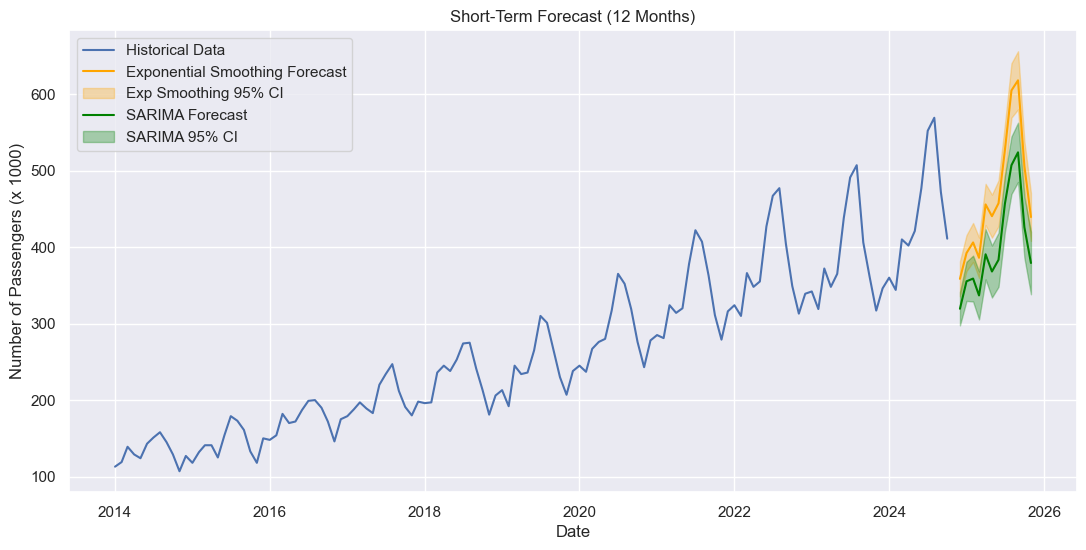

In [188]:
# short-term forecast --> next 12 months 
fig, ax = plt.subplots(figsize=(13, 6))

forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# exponential smoothing: forecast with prediction interval 
forecast_exp_smoothing = exp_smoothing.forecast(12)
exp_simulations = exp_smoothing.simulate(12, repetitions=1000)
exp_mean_forecast = exp_simulations.mean(axis=1)
exp_lower_bound = exp_mean_forecast - exp_simulations.std(axis=1) * 1.96 
exp_upper_bound = exp_mean_forecast + exp_simulations.std(axis=1) * 1.96

# SARIMA: forecast with prediction interval
sarima_forecast = sarima.get_forecast(steps=12)
sarima_forecast_mean = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()

sns.lineplot(x=df['Date'], y=df['Number of Passengers (x1000)'], label='Historical Data', ax=ax)
sns.lineplot(x=forecast_dates, y=exp_mean_forecast, label='Exponential Smoothing Forecast', color='orange', ax=ax)
ax.fill_between(forecast_dates, exp_lower_bound, exp_upper_bound, color='orange', alpha=0.3, label='95% CI')
sns.lineplot(x=forecast_dates, y=sarima_forecast_mean, label='SARIMA Forecast', color='green', ax=ax)
ax.fill_between(forecast_dates, sarima_conf_int.iloc[:, 0], sarima_conf_int.iloc[:, 1], color='green', alpha=0.3, label='95% CI')

plt.title("Short-Term Forecast (12 Months)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers (x 1000)")
plt.legend()
plt.show()


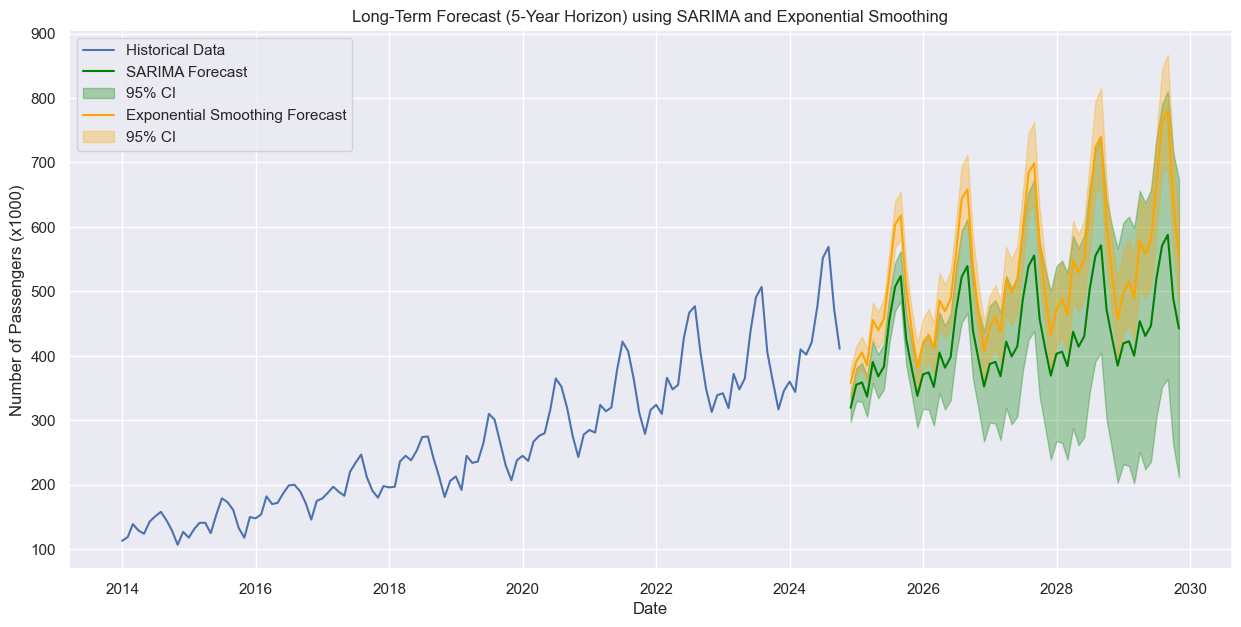

In [194]:
# long term forecast --> 5 years 
long_term_forecast_steps = 5 * 12
forecast_dates = pd.date_range(start=df['Date'].iloc[-1] + pd.DateOffset(months=1), periods=long_term_forecast_steps, freq='M')

# exponential smoothing: forecast with prediction interval 
exp_smoothing_forecast = exp_smoothing.forecast(long_term_forecast_steps)
exp_simulations = exp_smoothing.simulate(long_term_forecast_steps, repetitions=1000)
exp_mean_forecast = exp_simulations.mean(axis=1)
exp_lower_bound = exp_mean_forecast - exp_simulations.std(axis=1) * 1.96  # 95% CI
exp_upper_bound = exp_mean_forecast + exp_simulations.std(axis=1) * 1.96

# SARIMA: forecast with prediction interval 
sarima_long_term_forecast = sarima.get_forecast(steps=long_term_forecast_steps)
sarima_long_term_mean = sarima_long_term_forecast.predicted_mean
sarima_long_term_ci = sarima_long_term_forecast.conf_int()

fig, ax = plt.subplots(figsize=(15, 7))


sns.lineplot(x=df['Date'], y=df['Number of Passengers (x1000)'], label='Historical Data', ax=ax)
sns.lineplot(x=forecast_dates, y=sarima_long_term_mean, label='SARIMA Forecast', color='green', ax=ax)
ax.fill_between(forecast_dates, sarima_long_term_ci.iloc[:, 0], sarima_long_term_ci.iloc[:, 1], color='green', alpha=0.3, label='95% CI')
sns.lineplot(x=forecast_dates, y=exp_mean_forecast, label='Exponential Smoothing Forecast', color='orange', ax=ax)
ax.fill_between(forecast_dates, exp_lower_bound, exp_upper_bound, color='orange', alpha=0.3, label='95% CI')

plt.title("Long-Term Forecast (5-Year Horizon) using SARIMA and Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Number of Passengers (x1000)")
plt.legend()
plt.show()


In [202]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    bias = (y_pred - y_true).mean()
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mae, bias, mape

# Short-term forecast accuracy (next 12 months) for Exponential Smoothing
exp_smoothing_metrics = calculate_metrics(df_test['Number of Passengers (x1000)'][:12], forecast_exp_smoothing)
print(f"Exponential Smoothing - RMSE: {exp_smoothing_metrics[0]:.4f}, MAE: {exp_smoothing_metrics[1]:.4f}, Bias: {exp_smoothing_metrics[2]:.4f}, MAPE: {exp_smoothing_metrics[3]:.4f}%")

# Short-term forecast accuracy (next 12 months) for SARIMA
sarima_metrics = calculate_metrics(df_test['Number of Passengers (x1000)'][:12], sarima_forecast_mean)
print(f"SARIMA - RMSE: {sarima_metrics[0]:.4f}, MAE: {sarima_metrics[1]:.4f}, Bias: {sarima_metrics[2]:.4f}, MAPE: {sarima_metrics[3]:.4f}%")


Exponential Smoothing - RMSE: 42.9754, MAE: 42.3257, Bias: nan, MAPE: nan%
SARIMA - RMSE: 29.8850, MAE: 24.9742, Bias: -23.0280, MAPE: 5.4903%
